# Importing needed libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np

# Importing Data

In [2]:
#Importing data
pdf1950 = pd.read_excel('Census 1950.xlsx')

In [3]:
#Info about rows and columns
pdf1950.shape

#Changing the number of rows displayed
pd.set_option('display.max_rows', None)

#displaying first 5 rows
pdf1950.head()

,Statistics,"Census Tract 0009, Hamilton County, Ohio",Unnamed: 2,"Census Tract 0010, Hamilton County, Ohio",Unnamed: 4,"Census Tract 0016, Hamilton County, Ohio",Unnamed: 6,"Census Tract 0017, Hamilton County, Ohio",Unnamed: 8,TOTAL (All Selected Census Tracts),Unnamed: 10
0,SE:T1. Total Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total Population,7565,NaN,5781,NaN,5931,NaN,6353,NaN,25630,NaN
2,SE:T2. Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total Area (sq. miles),0.12,NaN,0.1,NaN,0.14,NaN,0.08,NaN,0.44,NaN
4,SE:T3. Population Density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning data

In [4]:
#Removing rows with all NaN values 
pdf1950 = pdf1950.dropna(subset=["Census Tract 0009, Hamilton County, Ohio"])

# Replacing NaN by 0s
pdf1950 = pdf1950.fillna(0)


#Showing a list of columns names
list(pdf1950)

['Statistics',
 'Census Tract 0009, Hamilton County, Ohio',
 'Unnamed: 2',
 'Census Tract 0010, Hamilton County, Ohio',
 'Unnamed: 4',
 'Census Tract 0016, Hamilton County, Ohio',
 'Unnamed: 6',
 'Census Tract 0017, Hamilton County, Ohio',
 'Unnamed: 8',
 'TOTAL (All Selected Census Tracts)',
 'Unnamed: 10']

In [5]:
#Removing columns I dont want
for col in pdf1950.columns:
    if 'Unnamed' in col:
        del pdf1950[col]

#Showing a list of columns names        
list(pdf1950)

['Statistics',
 'Census Tract 0009, Hamilton County, Ohio',
 'Census Tract 0010, Hamilton County, Ohio',
 'Census Tract 0016, Hamilton County, Ohio',
 'Census Tract 0017, Hamilton County, Ohio',
 'TOTAL (All Selected Census Tracts)']

In [6]:
#Renaming columns
pdf1950.columns = ['Category',
                   'Census Tract 9, Hamilton County, Ohio',
                   'Census Tract 10, Hamilton County, Ohio',
                   'Census Tract 16, Hamilton County, Ohio',
                   'Census Tract 17, Hamilton County, Ohio',
                   'TOTAL (All Selected Census Tracts)']

In [7]:
#Obtaining index values of all the rows
pdf1950.index.values

#Removing all the rows I don't want
pdf1950 = pdf1950.drop([1,   3,   5,   6,   7,   9,  10,  11,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  52,  53,  54,  55,  56,  57,  58,  59,
        61,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  80,  82,  83,  84,  85,  86,  87,  88,  90,
        91,  92,  94,  95,  96,  97,  98, 100, 102, 103, 104, 105, 107,
       109, 110, 111, 112, 113, 115, 116, 117, 119, 120, 122, 123, 124,
       125, 126, 128, 129, 130, 131, 133, 134, 135])

In [8]:
#Changing the data to floats
pdf1950 = pdf1950.astype({'Census Tract 9, Hamilton County, Ohio': np.float64, 'Census Tract 10, Hamilton County, Ohio':np.float64,
                          'Census Tract 16, Hamilton County, Ohio':np.float64,'Census Tract 17, Hamilton County, Ohio':np.float64,
                          'TOTAL (All Selected Census Tracts)':np.float64})

#Checking if data are floats now
pdf1950.dtypes

Category                                   object
Census Tract 9, Hamilton County, Ohio     float64
Census Tract 10, Hamilton County, Ohio    float64
Census Tract 16, Hamilton County, Ohio    float64
Census Tract 17, Hamilton County, Ohio    float64
TOTAL (All Selected Census Tracts)        float64
dtype: object

# Creating Visualizations

<AxesSubplot:xlabel='Category'>

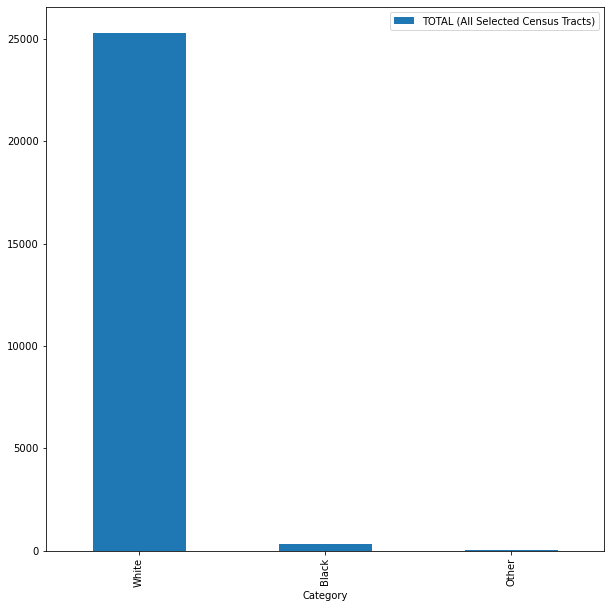

In [10]:
pdf1950.iloc[1:4].plot.bar(x = 'Category', y = 'TOTAL (All Selected Census Tracts)', figsize=(10,10))

In [16]:
pdf1950.to_pickle('pdf1950.pkl')